In [ ]:
#Observations
#1 In the northern hemisphere the temperature reduces as the latitude increases
#2 In the southern hemisphere the temperature increases as the latitude increases
#3 There is no correlation between latitude and cloudiness, humidity and wind speed.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [3]:
#List of cities
pprint(cities)

['arraial do cabo',
 'owen sound',
 'taolanaro',
 'hermanus',
 'mataura',
 'westport',
 'avarua',
 'saint anthony',
 'punta arenas',
 'thompson',
 'ancud',
 'los llanos de aridane',
 'new norfolk',
 'ushuaia',
 'dikson',
 'leningradskiy',
 'kuching',
 'bhanvad',
 'duki',
 'vaini',
 'tiksi',
 'sibolga',
 'sentyabrskiy',
 'saldanha',
 'port elizabeth',
 'hithadhoo',
 'kapaa',
 'urfa',
 'attawapiskat',
 'saint george',
 'dingtao',
 'clyde river',
 'vardo',
 'tugdan',
 'mar del plata',
 'toora-khem',
 'illoqqortoormiut',
 'tommot',
 'busselton',
 'te anau',
 'butaritari',
 'terre haute',
 'atuona',
 'ribeira grande',
 'takhtamygda',
 'bengkulu',
 'omagh',
 'grindavik',
 'chuy',
 'nizhnevartovsk',
 'moranbah',
 'rikitea',
 'hay river',
 'klaksvik',
 'jamestown',
 'tsihombe',
 'dunedin',
 'belushya guba',
 'yellowknife',
 'georgetown',
 'yenagoa',
 'lorengau',
 'east london',
 'castro',
 'macae',
 'bredasdorp',
 'cherskiy',
 'hamilton',
 'saint-philippe',
 'severo-kurilsk',
 'portland',
 'ta

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#counters
record = 0
sets = 1

city_df = pd.DataFrame({"City": cities})

#add columns for the rest of the data

city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind Speed'] = ""
city_df['Country'] = ""
city_df['Date'] = ""

#Iterate through the cities to get data from url

print(f'Beginning Data Retrieval')
print(f'-----------------------------------')
      
# Build query URL and request your results

for index, row in city_df.iterrows():
    
    
    try:
        city = row["City"]
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        # Get temperature from JSON response
        temperature = weather_json
        temperature
        
        print(f'Processing Record {record} of Set {sets} | {city}.')
        
        city_df.loc[index, 'Lat'] = temperature['coord']['lat']
        city_df.loc[index, 'Lng'] = temperature['coord']['lon']
        city_df.loc[index, 'Max Temp'] = temperature['main']['temp_max']
        city_df.loc[index, 'Humidity'] = temperature['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = temperature['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = temperature['wind']['speed']
        city_df.loc[index, 'Country'] = temperature['sys']['country']
        city_df.loc[index, 'Date'] = temperature['dt']
    
            
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 60:
        record = 0
        sets = sets + 1 
            
print(f'-----------------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------------')


Beginning Data Retrieval
-----------------------------------
Processing Record 0 of Set 1 | arraial do cabo.
Processing Record 1 of Set 1 | owen sound.
Processing Record 2 of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 3 of Set 1 | hermanus.
Processing Record 4 of Set 1 | mataura.
Processing Record 5 of Set 1 | westport.
Processing Record 6 of Set 1 | avarua.
Processing Record 7 of Set 1 | saint anthony.
Processing Record 8 of Set 1 | punta arenas.
Processing Record 9 of Set 1 | thompson.
Processing Record 10 of Set 1 | ancud.
Processing Record 11 of Set 1 | los llanos de aridane.
Processing Record 12 of Set 1 | new norfolk.
Processing Record 13 of Set 1 | ushuaia.
Processing Record 14 of Set 1 | dikson.
Processing Record 15 of Set 1 | leningradskiy.
Processing Record 16 of Set 1 | kuching.
Processing Record 17 of Set 1 | bhanvad.
Processing Record 18 of Set 1 | duki.
Processing Record 19 of Set 1 | vaini.
Processing Record 20 of Set 1 | tiksi.
Processing 

Processing Record 2 of Set 4 | suao.
City not found...skipping suao.
Processing Record 3 of Set 4 | umred.
Processing Record 4 of Set 4 | springhill.
Processing Record 5 of Set 4 | kruisfontein.
Processing Record 6 of Set 4 | juneau.
Processing Record 7 of Set 4 | pitimbu.
Processing Record 8 of Set 4 | yar-sale.
Processing Record 9 of Set 4 | jacareacanga.
Processing Record 10 of Set 4 | gamboma.
Processing Record 11 of Set 4 | tuktoyaktuk.
Processing Record 12 of Set 4 | jumla.
Processing Record 13 of Set 4 | moose factory.
Processing Record 14 of Set 4 | carballo.
Processing Record 15 of Set 4 | tacuati.
Processing Record 16 of Set 4 | isangel.
Processing Record 17 of Set 4 | arti.
Processing Record 18 of Set 4 | tuatapere.
Processing Record 19 of Set 4 | kavieng.
Processing Record 20 of Set 4 | provideniya.
Processing Record 21 of Set 4 | pogranichnyy.
Processing Record 22 of Set 4 | waipawa.
Processing Record 23 of Set 4 | pahuatlan.
City not found...skipping pahuatlan.
Processing

Processing Record 4 of Set 7 | sorvag.
City not found...skipping sorvag.
Processing Record 5 of Set 7 | vila velha.
Processing Record 6 of Set 7 | belle fourche.
Processing Record 7 of Set 7 | sao borja.
Processing Record 8 of Set 7 | tres arroyos.
Processing Record 9 of Set 7 | balkhash.
Processing Record 10 of Set 7 | najran.
Processing Record 11 of Set 7 | umzimvubu.
City not found...skipping umzimvubu.
Processing Record 12 of Set 7 | mugla.
Processing Record 13 of Set 7 | melekhovskaya.
City not found...skipping melekhovskaya.
Processing Record 14 of Set 7 | sao gabriel da cachoeira.
Processing Record 15 of Set 7 | chicama.
Processing Record 16 of Set 7 | adrar.
Processing Record 17 of Set 7 | batangafo.
Processing Record 18 of Set 7 | maniitsoq.
Processing Record 19 of Set 7 | tokzar.
City not found...skipping tokzar.
Processing Record 20 of Set 7 | khatanga.
Processing Record 21 of Set 7 | namie.
Processing Record 22 of Set 7 | andevoranto.
City not found...skipping andevoranto.


Processing Record 7 of Set 10 | riberalta.
Processing Record 8 of Set 10 | kastamonu.
Processing Record 9 of Set 10 | at-bashi.
Processing Record 10 of Set 10 | longlac.
City not found...skipping longlac.
Processing Record 11 of Set 10 | grootfontein.
Processing Record 12 of Set 10 | syracuse.
Processing Record 13 of Set 10 | port hedland.
Processing Record 14 of Set 10 | salamanca.
Processing Record 15 of Set 10 | dankov.
Processing Record 16 of Set 10 | thohoyandou.
Processing Record 17 of Set 10 | taburi.
City not found...skipping taburi.
Processing Record 18 of Set 10 | akyab.
Processing Record 19 of Set 10 | praya.
Processing Record 20 of Set 10 | marabba.
Processing Record 21 of Set 10 | murgesti.
Processing Record 22 of Set 10 | korla.
Processing Record 23 of Set 10 | guerrero negro.
Processing Record 24 of Set 10 | altagracia de orituco.
Processing Record 25 of Set 10 | sakaiminato.
Processing Record 26 of Set 10 | corinth.
Processing Record 27 of Set 10 | doka.
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df.to_csv('../output_data/city_data.csv', index=False)

In [6]:
city_data = pd.read_csv('../output_data/city_data.csv')
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,20.10,56.0,56.0,11.53,BR,1.660196e+09
1,owen sound,44.5672,-80.9435,18.98,81.0,45.0,1.79,CA,1.660196e+09
2,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hermanus,-34.4187,19.2345,8.78,89.0,98.0,2.95,ZA,1.660196e+09
4,mataura,-46.1927,168.8643,6.93,71.0,31.0,1.84,NZ,1.660196e+09


In [7]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.00000,535.000000,535.000000,535.000000,5.350000e+02
mean,21.085930,13.004744,20.27385,72.381308,56.897196,3.614748,1.660196e+09
std,33.249728,90.972064,7.70636,19.402219,38.314668,2.770895,6.411802e+01
min,-54.800000,-175.200000,0.06000,1.000000,0.000000,0.000000,1.660195e+09
25%,-4.579300,-66.217800,14.86000,60.500000,20.000000,1.620000,1.660196e+09
50%,24.800000,15.596000,21.43000,76.000000,67.000000,2.910000,1.660196e+09
75%,47.850000,92.883350,25.92000,88.000000,98.000000,4.880000,1.660196e+09
max,78.218600,178.416700,38.16000,100.000000,100.000000,17.190000,1.660196e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
# No cities with humidity over 100 as in the above table the max humidity shown is 100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# No cities with humidity over 100 as in the above table the max humidity shown is 100
clean_city_data = city_data_df
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,20.10,56.0,56.0,11.53,BR,1.660196e+09
1,owen sound,44.5672,-80.9435,18.98,81.0,45.0,1.79,CA,1.660196e+09
2,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hermanus,-34.4187,19.2345,8.78,89.0,98.0,2.95,ZA,1.660196e+09
4,mataura,-46.1927,168.8643,6.93,71.0,31.0,1.84,NZ,1.660196e+09


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

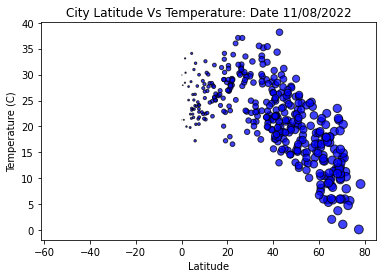

In [12]:
xl = clean_city_data['Lat']
yt = clean_city_data['Max Temp']
plt.scatter(xl, yt, marker="o", facecolors="blue", edgecolors="black", s=xl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Latitude Vs Temperature: Date 11/08/2022")
plt.show();

## Latitude vs. Humidity Plot

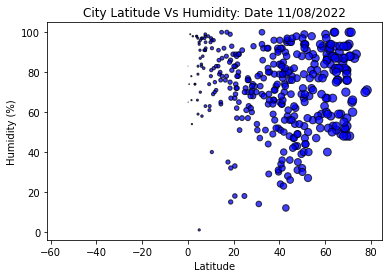

In [13]:
yh = clean_city_data['Humidity']
plt.scatter(xl, yh, marker="o", facecolors="blue", edgecolors="black", s=xl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs Humidity: Date 11/08/2022")
plt.show();

## Latitude vs. Cloudiness Plot

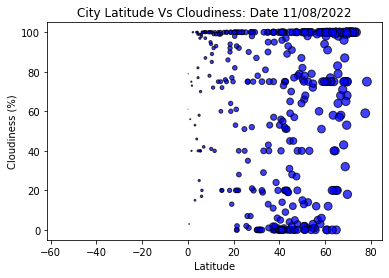

In [14]:
yc = clean_city_data['Cloudiness']
plt.scatter(xl, yc, marker="o", facecolors="blue", edgecolors="black", s=xl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs Cloudiness: Date 11/08/2022")
plt.show();

## Latitude vs. Wind Speed Plot

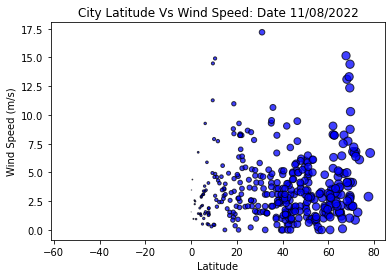

In [15]:
yw = clean_city_data['Wind Speed']
plt.scatter(xl, yw, marker="o", facecolors="blue", edgecolors="black", s=xl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs Wind Speed: Date 11/08/2022")
plt.show();

## Linear Regression

In [17]:
northern_hemisphere = clean_city_data.loc[(clean_city_data['Lat']) > 0, :]
southern_hemisphere = clean_city_data.loc[(clean_city_data['Lat']) < 0, :]

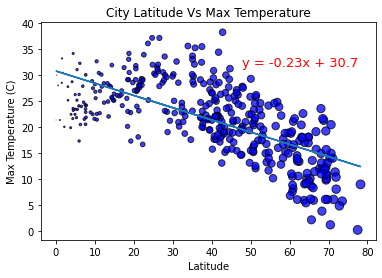

The r-value is:-0.667485727521812


In [22]:
xnl = northern_hemisphere['Lat']
ynt = northern_hemisphere['Max Temp']

slope, intercept, rvalue, pvalue, std_err = linregress(xnl, ynt)
fit = slope * xnl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xnl, ynt, marker="o", facecolors="blue", edgecolors="black", s=xnl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude Vs Max Temperature")
plt.plot(xnl,fit,"-")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.6, 0.80), textcoords="axes fraction", fontsize=13,color="red")
plt.show();
print(f'The r-value is:{rvalue}')

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

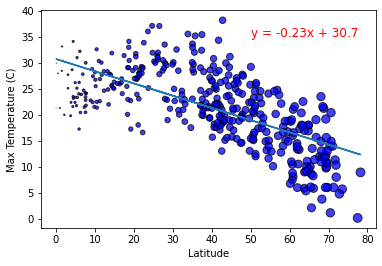

The r-value is:-0.667485727521812


In [79]:
xnl = northern_hemisphere['Lat']
ynt = northern_hemisphere['Max Temp']

slope, intercept, rvalue, pvalue, std_err = linregress(xnl, ynt)
fit = slope * xnl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xnl, ynt, marker="o", facecolors="blue", edgecolors="black", s=xnl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.plot(xnl,fit,"-")
plt.annotate(line_eq, (50,35),fontsize=12,color="red")
plt.show();
print(f'The r-value is:{rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

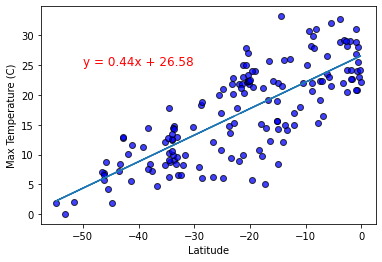

The r-value is:0.7799155253774726


In [80]:
xsl = southern_hemisphere['Lat']
yst = southern_hemisphere['Max Temp']

slope, intercept, rvalue, pvalue, std_err = linregress(xsl, yst)
fit = slope * xsl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xsl, yst, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.plot(xsl,fit,"-")
plt.annotate(line_eq, xy=(-50,25),fontsize=12,color="red")
plt.show()
print(f'The r-value is:{rvalue}')

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

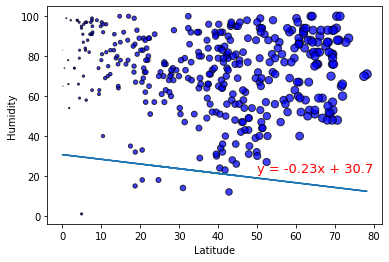

The r-value is:-0.667485727521812


In [81]:
xnl = northern_hemisphere['Lat']
ynh = northern_hemisphere['Humidity']

slope, intercept, rvalue, pvalue, std_err = linregress(xnl, ynt)
fit = slope * xnl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xnl, ynh, marker="o", facecolors="blue", edgecolors="black", s=xnl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(xnl,fit,"-")
plt.annotate(line_eq, xy=(50,22), fontsize=13,color="red")
plt.show();
print(f'The r-value is:{rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

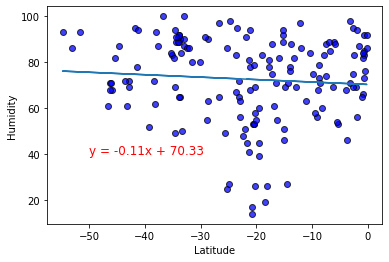

The r-value is:-0.07826890578733323


In [82]:
xsl = southern_hemisphere['Lat']
ysh = southern_hemisphere['Humidity']

slope, intercept, rvalue, pvalue, std_err = linregress(xsl, ysh)
fit = slope * xsl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xsl, ysh, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(xsl,fit,"-")
plt.annotate(line_eq, xy=(-50,40),fontsize=12,color="red")
plt.show()
print(f'The r-value is:{rvalue}')

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

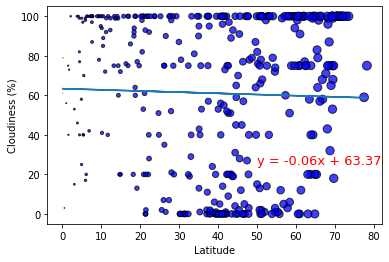

The r-value is:-0.031833583641717206


In [85]:
xnl = northern_hemisphere['Lat']
ync = northern_hemisphere['Cloudiness']

slope, intercept, rvalue, pvalue, std_err = linregress(xnl, ync)
fit = slope * xnl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xnl, ync, marker="o", facecolors="blue", edgecolors="black", s=xnl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(xnl,fit,"-")
plt.annotate(line_eq, xy=(50,25), fontsize=13,color="red")
plt.show();
print(f'The r-value is:{rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

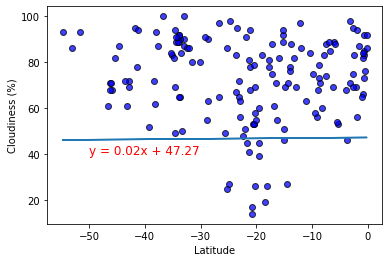

The r-value is:0.00754162804872582


In [86]:
xsl = southern_hemisphere['Lat']
ysc = southern_hemisphere['Cloudiness']

slope, intercept, rvalue, pvalue, std_err = linregress(xsl, ysc)
fit = slope * xsl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xsl, ysh, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(xsl,fit,"-")
plt.annotate(line_eq, xy=(-50,40),fontsize=12,color="red")
plt.show()
print(f'The r-value is:{rvalue}')

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

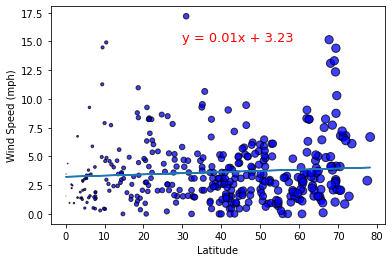

The r-value is:0.0758709960014769


In [95]:
xnl = northern_hemisphere['Lat']
ynw = northern_hemisphere['Wind Speed']

slope, intercept, rvalue, pvalue, std_err = linregress(xnl, ynw)
fit = slope * xnl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xnl, ynw, marker="o", facecolors="blue", edgecolors="black", s=xnl, alpha=0.75);
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(xnl,fit,"-")
plt.annotate(line_eq, xy=(30,15), fontsize=13,color="red")
plt.show();
print(f'The r-value is:{rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

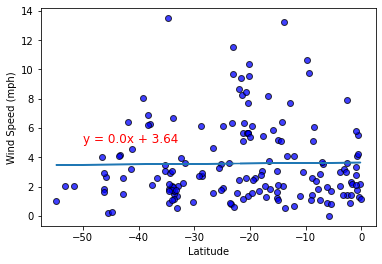

The r-value is:0.015550460881365635


In [98]:
xsl = southern_hemisphere['Lat']
ysw = southern_hemisphere['Wind Speed']

slope, intercept, rvalue, pvalue, std_err = linregress(xsl, ysw)
fit = slope * xsl + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xsl, ysw, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(xsl,fit,"-")
plt.annotate(line_eq, xy=(-50,5),fontsize=12,color="red")
plt.show()
print(f'The r-value is:{rvalue}')